<a href="https://colab.research.google.com/github/Tasmiya77/TheSparksFoundationTask1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Data Science & Business Analytics**


Name: <b>Umme Tasmiya</b>

### **Task 1 : Prediction using Supervised Machine Learning**

### **● Problem statement:**
**Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

### **Reading the Data**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Getting the Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
print(df.shape)

(25, 2)


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for outliers

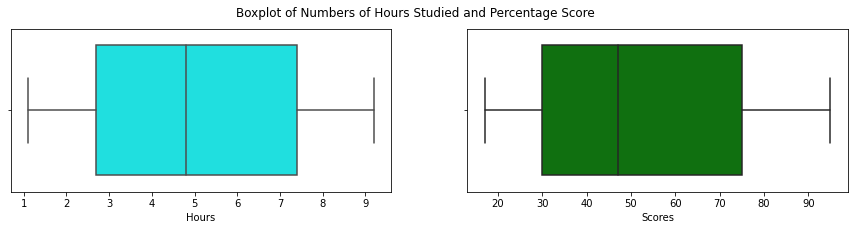

In [ ]:
fig, axes =plt.subplots(1,2,figsize= (15,3))
fig.suptitle("Boxplot of Numbers of Hours Studied and Percentage Score")
sns.set_style("whitegrid")
sns.boxplot(ax= axes[0], x= df['Hours'], color='cyan')
sns.boxplot(ax= axes[1], x= df['Scores'], color='green')
plt.show()

Hence from the above output we can conclude that there are no outliers

### **Plotting the distribution of scores**

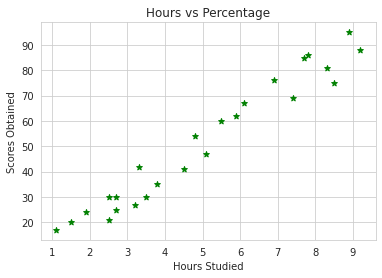

In [ ]:
plt.scatter(df.Hours,df.Scores,color='green',marker='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Data Preprocessing:**


**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)**

In [ ]:
X = df.iloc[:, :-1].values  # independent variable
y = df.iloc[:, 1].values    # dependent variable

### **Model Training**

**Splitting the data into training and testing sets, and training the algorithm**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Plotting the Line of regression**

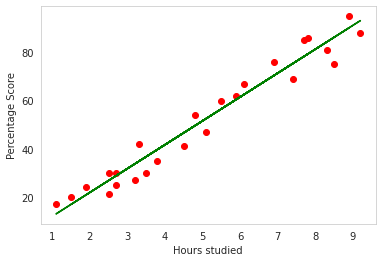

In [ ]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, line,color='green');
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**Checking correlation between features using heatmap**

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


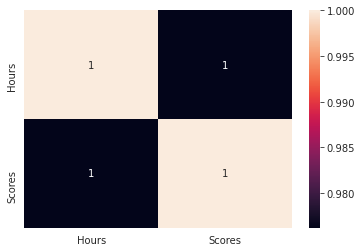

In [ ]:
print(df.corr())
sns.heatmap(df.corr(),annot=True,fmt=".1g")

### **Making Predictions**

In [ ]:
print(X_test) #Testing data
y_pred= regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Predicting the score if hours=9.25**

In [ ]:
Hours=9.25
own_pred=regressor.predict([[Hours]])
print("The predicted score if a person studies for",Hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737539


In [ ]:
import statsmodels.formula.api as smf
model=smf.ols(formula='Scores ~ Hours', data=df).fit()
model.conf_int()

PatsyError: ignored

### **Evaluating the model**

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


**Here, we can say that the accuracy of our model is 94.54%**

### **Conclusion**

I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

### **From the above results therefore it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69%**

### *ThankYou*